### Oklahoma purchase credit card transactions

The Office of Management and Enterprise Services in the State of Oklahoma has made its [purchase credit card transactions](https://catalog.data.gov/dataset/purchase-card-pcard-fiscal-year-2014) available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions. 

In this assignment, you will complete the following tasks.

- Create new features and conduct exploratory data analysis. Your exploratory data analysis should be as exhaustive as possible. 
- Each feature or discussion is a new lead. Structure your EDA for different leads with sub-sections. Each sub-section will cover the following:
    - Lead: Write what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is the business insight? How can this feature help prediction? Write a short conclusion in the end of each sub-section. 

-  Submit in the HTML format.  

In [1]:
library(dplyr)
#library(DataExplorer)
#library(xda)
library(ggplot2)
library(plotly)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
ccard <- read.csv("/Users/chriskuo/Downloads/purchase_credit_card.csv")

In [3]:
dim(ccard)
summary(ccard)
colnames(ccard)

[1] 442458     11

   Year.Month     Agency.Number  
 Min.   :201307   Min.   : 1000  
 1st Qu.:201309   1st Qu.: 1000  
 Median :201401   Median :47700  
 Mean   :201357   Mean   :42786  
 3rd Qu.:201404   3rd Qu.:76000  
 Max.   :201406   Max.   :98000  
                                 
                                Agency.Name    
 OKLAHOMA STATE UNIVERSITY            :115995  
 UNIVERSITY OF OKLAHOMA               : 76143  
 UNIV. OF OKLA. HEALTH SCIENCES CENTER: 58247  
 DEPARTMENT OF CORRECTIONS            : 22322  
 DEPARTMENT OF TOURISM AND RECREATION : 17232  
 DEPARTMENT OF TRANSPORTATION         : 15689  
 (Other)                              :136830  
               Cardholder.Last.Name Cardholder.First.Initial
 JOURNEY HOUSE TRAVEL INC: 10137    J      : 55031          
 UNIVERSITY AMERICAN     :  7219    G      : 42251          
 JOURNEY HOUSE TRAVEL    :  4693    D      : 38120          
 Heusel                  :  4212    M      : 35352          
 Hines                   :  3423    S  

[1] "Year.Month"                   "Agency.Number"               
 [3] "Agency.Name"                  "Cardholder.Last.Name"        
 [5] "Cardholder.First.Initial"     "Description"                 
 [7] "Amount"                       "Vendor"                      
 [9] "Transaction.Date"             "Posted.Date"                 
[11] "Merchant.Category.Code..MCC."

In [4]:
# Count of agencies
# Spent by agency
# Count by merchant.Category.Code
colnames(ccard)<-c('Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category')

In [5]:
nrow(ccard)

[1] 442458

Agency_Name_ind,count,amount,percent,mean,min,max
1_OKLAHOMA STATE UNIVERSITY,115995,33778840,0.17963575,291.2094,-6266.53,27967.38
2_UNIVERSITY OF OKLAHOMA,76143,24886383,0.13234570,326.8374,-41740.00,114203.17
3_UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247,24527325,0.13043623,421.0916,-7188.61,1903858.37
4_GRAND RIVER DAM AUTH.,10427,22213829,0.11813306,2130.4142,-9000.00,1089180.00
5_DEPARTMENT OF TRANSPORTATION,15689,14399262,0.07657522,917.7935,-34108.00,348053.75
6_DEPARTMENT OF CORRECTIONS,22322,13988872,0.07439277,626.6854,-20000.00,96190.38


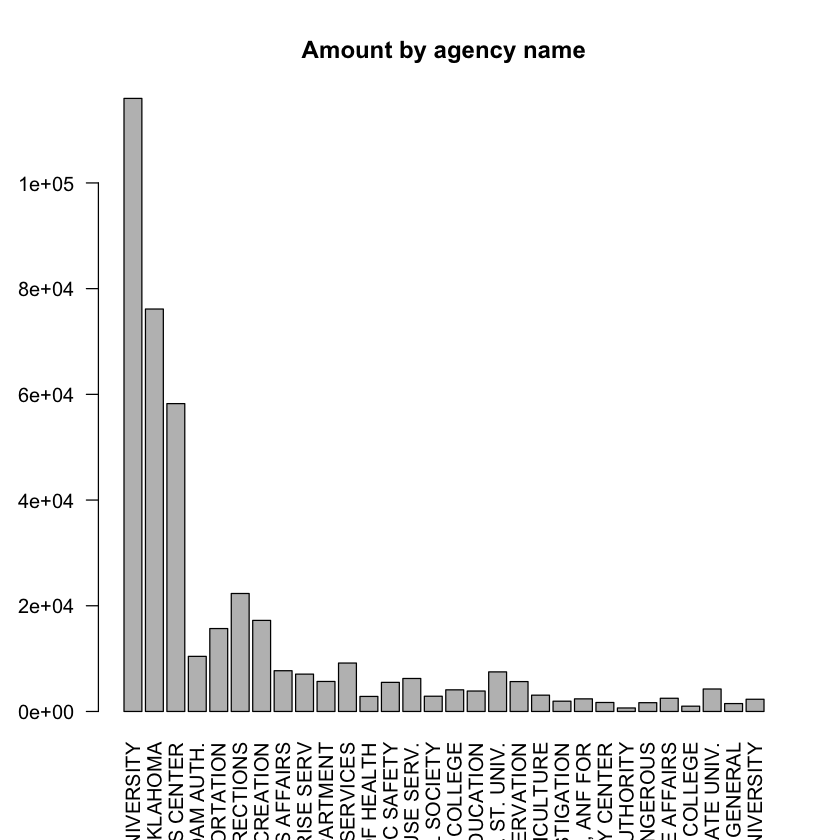

In [8]:
# Simple Bar Plot 
stat_by_agency <- ccard %>% group_by(Agency_Name) %>%
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount)
             ) %>%
    arrange(desc(amount)) %>% ungroup() 

stat_by_agency <- stat_by_agency %>%
    mutate(row = rep(1:nrow(stat_by_agency)),
          Agency_Name_ind = paste(row,Agency_Name,sep="_"),
          percent = amount/sum(amount)) %>%
    select(Agency_Name_ind,count, amount, percent,mean, min, max)

head(stat_by_agency)
temp <-stat_by_agency[1:30,]
barplot(temp$count,names.arg=temp$Agency_Name_ind,
main="Amount by agency name",las=2       )

#### Create timestamp

In [11]:
time_by_agency <- ccard %>% group_by(Agency_Name) %>%
    mutate(Transaction_Date=as.Date(Transaction_Date,format="%m/%d/%Y %H:%M")) %>%
    arrange(Agency_Name,Transaction_Date) %>%
    mutate(time = Transaction_Date-lag(Transaction_Date) ) 
    
time_by_agency[,c("Agency_Number","Agency_Name", "Transaction_Date", "time")]

Agency_Number,Agency_Name,Transaction_Date,time
26500,`DEPARTMENT OF EDUCATION,2013-06-29,NA days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,0 days


#### Frequency

In [ ]:
    
time_by_agency %>% filter(Agency_Number ==26500) %>% group_by(vendor,Merchant_Category)